## Import Dataset

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
path = 'sample_dataset/'

In [57]:
df_nyse = pd.read_csv(path + 'nyse-energy-company-stock-closing-prices-2020.csv',
                      usecols=['Value','Date','Stock Name'],
                      parse_dates=['Date'],
                      index_col='Date').sort_index()
df_nyse['Stock Name'].value_counts()

BP P.L.C.                            262
CONOCOPHILLIPS                       254
MARATHON PETROLEUM CORPORATION       249
MARATHON OIL CORPORATION             249
CHEVRON CORPORATION                  249
VALERO ENERGY CORPORATION            248
PHILLIPS 66                          248
PIONEER NATURAL RESOURCES COMPANY    248
OCCIDENTAL PETROLEUM CORPORATION     248
EXXON MOBIL CORPORATION              247
Name: Stock Name, dtype: int64

Here we select Chevron Corporation as target focus

In [58]:
df_nyse_chevron = df_nyse['Value'][df_nyse['Stock Name'] == 'CHEVRON CORPORATION']

In [59]:
df_nyse_chevron.head()

Date
2020-01-02    121.43
2020-01-03    121.01
2020-01-06    120.60
2020-01-07    119.06
2020-01-08    117.70
Name: Value, dtype: float64

## News Sentiment

there is several news sentiment index dataset from different keyword\
"chevron"\
"energy"\
"oil and gas"\
"covid"\
"financial, global"\
"exxon"\
"valero"\
"phillips"\
"marathon"\
"dow jones"

In [60]:
def load_news(file, colname):
    df_news = pd.read_csv(path+file,
                          usecols=['DateTime','Index'],
                          parse_dates=['DateTime'],
                          index_col=['DateTime']).sort_index()
    df_news.rename(columns={'Index':colname}, inplace=True)
    return df_news

In [61]:
df_news_chevron = load_news('news-sentiment-chevron.csv', 'nw_chevron')
df_news_energy = load_news('news-sentiment-energy.csv', 'nw_energy')
df_news_oilandgas = load_news('news-sentiment-oilandgas.csv', 'nw_oilandgas')
df_news_covid = load_news('news-sentiment-covid.csv', 'nw_covid')
df_news_financial = load_news('financial-news.csv', 'nw_financial')
df_news_exxon = load_news('ave-daily-news-sentiment-exxon-2020.csv', 'nw_exxon')
df_news_valero = load_news('news-sentiment-valero.csv', 'nw_valero')
df_news_phillips = load_news('news-sentiment-philips.csv', 'nw_phillips')
df_news_marathon = load_news('news-sentiment-marathon.csv', 'nw_marathon')
df_news_dowjones = load_news('news-sentiment-dowjones.csv', 'nw_dowjones')


In [62]:
df_news_chevron

,nw_chevron
DateTime,
2000-01-19,NaN
2000-01-20,NaN
2000-01-21,NaN
2000-01-22,NaN
2000-01-23,NaN
...,...
2021-03-08,NaN
2021-03-09,-0.30
2021-03-10,-0.05


In [63]:
dfs = [df_nyse_chevron, df_news_chevron, df_news_energy, df_news_oilandgas, df_news_covid,
       df_news_financial, df_news_exxon, df_news_valero, df_news_phillips, df_news_marathon, df_news_dowjones]

In [64]:
# merge all news sentiment datasets to df_comb

from functools import reduce

df_comb = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, left_index=True, right_index=True, how='left'), 
                dfs)
df_comb.head()

,Value,nw_chevron,nw_energy,nw_oilandgas,nw_covid,nw_financial,nw_exxon,nw_valero,nw_phillips,nw_marathon,nw_dowjones
Date,,,,,,,,,,,
2020-01-02,121.43,NaN,-0.225000,-0.500,NaN,-0.0800,-0.1,NaN,-0.2500,0.400000,NaN
2020-01-03,121.01,NaN,-0.130769,-0.225,NaN,-0.2375,-0.4,NaN,-0.6000,0.400000,NaN
2020-01-06,120.60,-0.70,-0.015385,-0.500,NaN,-0.2400,NaN,NaN,0.2000,0.100000,NaN
2020-01-07,119.06,-0.70,-0.094444,-0.350,NaN,-0.1300,NaN,NaN,-0.0125,0.225000,NaN
2020-01-08,117.70,-0.35,-0.215385,0.000,NaN,-0.3750,NaN,NaN,-0.1000,0.233333,-0.3


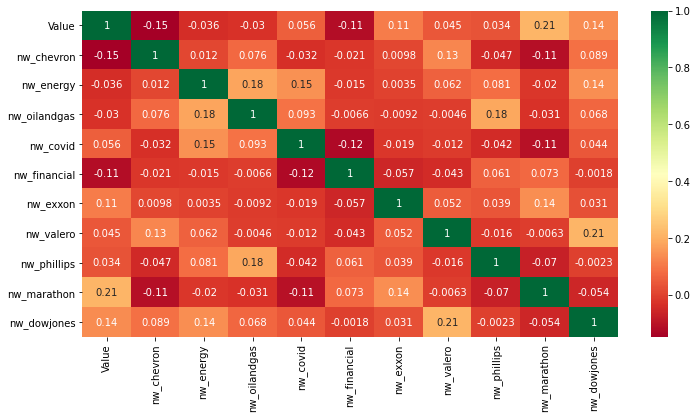

In [65]:
df_comb.fillna(0, inplace=True)
plt.figure(figsize=(12,6))
sns.heatmap(df_comb.corr(), cmap='RdYlGn', annot=True)
plt.show()

according to the heatmap above, news sentiment has weak correlation with Chevron's stock exchange value\
Correlation coefficient values below 0.3 are considered to be weak; 0.3-0.7 are moderate; >0.7 are strong

## Google Mobility

In [66]:
df_google_mobility = pd.read_csv(path+'google-mobility-index-la-county-2020.csv',
                                 parse_dates=['Date'],
                                 index_col='Date').sort_index()
df_google_mobility

,Value,Sub-Sector,Super Region,Sub Region 2,Frequency,Country Region,Sub Region 1,Unit,Source,Indicator
Date,,,,,,,,,,
2020-02-15,-1,GOOGLE MOBILITY INDEX,GLOBAL DATA,LOS ANGELES COUNTY,DAILY,UNITED STATES,CALIFORNIA,INDEX,GOOGLE LLC,WORKPLACES PERCENT CHANGE FROM BASELINE
2020-02-15,-1,GOOGLE MOBILITY INDEX,GLOBAL DATA,LOS ANGELES COUNTY,DAILY,UNITED STATES,CALIFORNIA,INDEX,GOOGLE LLC,TRANSIT STATIONS PERCENT CHANGE FROM BASELINE
2020-02-15,1,GOOGLE MOBILITY INDEX,GLOBAL DATA,LOS ANGELES COUNTY,DAILY,UNITED STATES,CALIFORNIA,INDEX,GOOGLE LLC,RETAIL AND RECREATION PERECENT CHANGE FROM BAS...
2020-02-15,13,GOOGLE MOBILITY INDEX,GLOBAL DATA,LOS ANGELES COUNTY,DAILY,UNITED STATES,CALIFORNIA,INDEX,GOOGLE LLC,PARKS PERCENT CHANGE FROM BASELINE
2020-02-16,-1,GOOGLE MOBILITY INDEX,GLOBAL DATA,LOS ANGELES COUNTY,DAILY,UNITED STATES,CALIFORNIA,INDEX,GOOGLE LLC,TRANSIT STATIONS PERCENT CHANGE FROM BASELINE
...,...,...,...,...,...,...,...,...,...,...
2020-12-31,-58,GOOGLE MOBILITY INDEX,GLOBAL DATA,LOS ANGELES COUNTY,DAILY,UNITED STATES,CALIFORNIA,INDEX,GOOGLE LLC,WORKPLACES PERCENT CHANGE FROM BASELINE
2020-12-31,-30,GOOGLE MOBILITY INDEX,GLOBAL DATA,LOS ANGELES COUNTY,DAILY,UNITED STATES,CALIFORNIA,INDEX,GOOGLE LLC,RETAIL AND RECREATION PERECENT CHANGE FROM BAS...
2020-12-31,20,GOOGLE MOBILITY INDEX,GLOBAL DATA,LOS ANGELES COUNTY,DAILY,UNITED STATES,CALIFORNIA,INDEX,GOOGLE LLC,RESIDENTIAL PERCENT CHANGE FROM BASELINE


In [67]:
df_google_mobility['Indicator'].value_counts()

RETAIL AND RECREATION PERECENT CHANGE FROM BASELINE    321
WORKPLACES PERCENT CHANGE FROM BASELINE                319
PARKS PERCENT CHANGE FROM BASELINE                     318
TRANSIT STATIONS PERCENT CHANGE FROM BASELINE          317
GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE      316
RESIDENTIAL PERCENT CHANGE FROM BASELINE               309
Name: Indicator, dtype: int64

In [68]:
df_gmob = df_google_mobility.pivot(columns='Indicator', values='Value')
df_gmob.columns

Index(['GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE',
       'PARKS PERCENT CHANGE FROM BASELINE',
       'RESIDENTIAL PERCENT CHANGE FROM BASELINE',
       'RETAIL AND RECREATION PERECENT CHANGE FROM BASELINE',
       'TRANSIT STATIONS PERCENT CHANGE FROM BASELINE',
       'WORKPLACES PERCENT CHANGE FROM BASELINE'],
      dtype='object', name='Indicator')

In [69]:
for i,j in enumerate(df_gmob.columns):
    df_gmob.rename(columns={str(j):'indicator'+str(i)}, inplace=True)
df_gmob.fillna(0, inplace=True)
df_gmob['sum_gmob'] = df_gmob.sum(axis=1)
df_gmob

Indicator,indicator0,indicator1,indicator2,indicator3,indicator4,indicator5,sum_gmob
Date,,,,,,,
2020-02-15,0.0,13.0,0.0,1.0,-1.0,-1.0,12.0
2020-02-16,-1.0,27.0,-1.0,4.0,-1.0,0.0,28.0
2020-02-17,0.0,30.0,7.0,7.0,-11.0,-32.0,1.0
2020-02-18,0.0,11.0,0.0,-1.0,2.0,2.0,14.0
2020-02-19,-1.0,13.0,0.0,-1.0,1.0,2.0,14.0
...,...,...,...,...,...,...,...
2020-12-27,-25.0,-33.0,11.0,-41.0,-48.0,-27.0,-163.0
2020-12-28,-30.0,-64.0,21.0,-43.0,-60.0,-52.0,-228.0
2020-12-29,-11.0,-29.0,18.0,-31.0,-48.0,-50.0,-151.0


In [70]:
df_comb = pd.merge(df_comb, df_gmob, how='left', left_index=True, right_index=True)
df_comb.isna().sum()

Value            0
nw_chevron       0
nw_energy        0
nw_oilandgas     0
nw_covid         0
nw_financial     0
nw_exxon         0
nw_valero        0
nw_phillips      0
nw_marathon      0
nw_dowjones      0
indicator0      31
indicator1      31
indicator2      31
indicator3      31
indicator4      31
indicator5      31
sum_gmob        31
dtype: int64

In [71]:
df_comb.fillna(0, inplace=True)
df_comb

,Value,nw_chevron,nw_energy,nw_oilandgas,nw_covid,nw_financial,nw_exxon,nw_valero,nw_phillips,nw_marathon,nw_dowjones,indicator0,indicator1,indicator2,indicator3,indicator4,indicator5,sum_gmob
Date,,,,,,,,,,,,,,,,,,
2020-01-02,121.43,0.00,-0.225000,-0.500,0.0,-0.080000,-0.1,0.000000e+00,-0.250000,0.400000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,121.01,0.00,-0.130769,-0.225,0.0,-0.237500,-0.4,0.000000e+00,-0.600000,0.400000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-06,120.60,-0.70,-0.015385,-0.500,0.0,-0.240000,0.0,0.000000e+00,0.200000,0.100000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-07,119.06,-0.70,-0.094444,-0.350,0.0,-0.130000,0.0,0.000000e+00,-0.012500,0.225000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-08,117.70,-0.35,-0.215385,0.000,0.0,-0.375000,0.0,0.000000e+00,-0.100000,0.233333,-0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,85.33,0.00,-0.109615,0.300,0.0,-0.100000,-0.2,0.000000e+00,-0.100000,0.416667,0.00,11.0,-48.0,20.0,-33.0,-52.0,-61.0,-163.0
2020-12-28,84.90,0.00,0.100000,-0.100,0.0,-0.305000,0.0,3.000000e-01,0.020000,0.000000,0.00,-30.0,-64.0,21.0,-43.0,-60.0,-52.0,-228.0
2020-12-29,84.61,0.20,-0.121429,0.100,0.0,-0.312500,-0.5,0.000000e+00,-0.100000,-0.428571,0.00,-11.0,-29.0,18.0,-31.0,-48.0,-50.0,-151.0


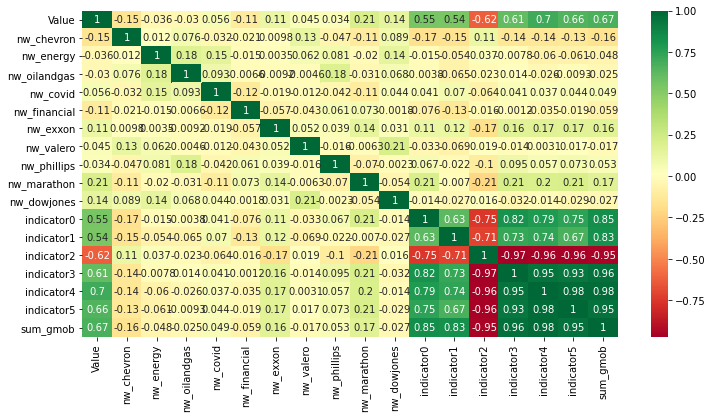

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comb.corr(), cmap='RdYlGn', annot=True)
plt.show()

according to heatmap above, the google mobility index has good correlation with Chevron's stock exchange value\
indicator2 has moderate negative correlation

## Apple Mobility

In [73]:
df_apple_mobility = pd.read_excel(path+'apple-mobility-california-2020.xlsx',
                                 parse_dates=['Date'],
                                 index_col='Date').sort_index()
df_apple_mobility

,Value,Sub-Sector,Super Region,Frequency,Region,Country,Unit,Geography Type,Transportation Type,Source
Date,,,,,,,,,,
2020-01-13,100.00,APPLE MOBILITY INDEX,GLOBAL DATA,DAILY,CALIFORNIA,UNITED STATES,INDEX,SUB-REGION,WALKING,"APPLE, INC."
2020-01-13,100.00,APPLE MOBILITY INDEX,GLOBAL DATA,DAILY,CALIFORNIA,UNITED STATES,INDEX,SUB-REGION,DRIVING,"APPLE, INC."
2020-01-13,100.00,APPLE MOBILITY INDEX,GLOBAL DATA,DAILY,CALIFORNIA,UNITED STATES,INDEX,SUB-REGION,TRANSIT,"APPLE, INC."
2020-01-14,102.59,APPLE MOBILITY INDEX,GLOBAL DATA,DAILY,CALIFORNIA,UNITED STATES,INDEX,SUB-REGION,TRANSIT,"APPLE, INC."
2020-01-14,104.70,APPLE MOBILITY INDEX,GLOBAL DATA,DAILY,CALIFORNIA,UNITED STATES,INDEX,SUB-REGION,WALKING,"APPLE, INC."
...,...,...,...,...,...,...,...,...,...,...
2020-12-30,100.03,APPLE MOBILITY INDEX,GLOBAL DATA,DAILY,CALIFORNIA,UNITED STATES,INDEX,SUB-REGION,DRIVING,"APPLE, INC."
2020-12-30,39.23,APPLE MOBILITY INDEX,GLOBAL DATA,DAILY,CALIFORNIA,UNITED STATES,INDEX,SUB-REGION,TRANSIT,"APPLE, INC."
2020-12-31,93.16,APPLE MOBILITY INDEX,GLOBAL DATA,DAILY,CALIFORNIA,UNITED STATES,INDEX,SUB-REGION,WALKING,"APPLE, INC."


In [74]:
df_apple_mobility['Transportation Type'].value_counts()

WALKING    354
TRANSIT    354
DRIVING    352
Name: Transportation Type, dtype: int64

Apple divided mobility index based on transportation type

In [75]:
df_amob = df_apple_mobility.pivot(columns='Transportation Type', values='Value')
df_amob.columns

Index(['DRIVING', 'TRANSIT', 'WALKING'], dtype='object', name='Transportation Type')

In [76]:
for i,j in enumerate(df_amob.columns):
    df_amob.rename(columns={str(j):'trtype'+str(i)}, inplace=True)
df_amob['sum_amob'] = df_amob.sum(axis=1)
df_amob

Transportation Type,trtype0,trtype1,trtype2,sum_amob
Date,,,,
2020-01-13,100.00,100.00,100.00,300.00
2020-01-14,104.39,102.59,104.70,311.68
2020-01-15,109.34,103.78,106.03,319.15
2020-01-16,109.36,100.18,98.45,307.99
2020-01-17,129.78,110.55,123.92,364.25
...,...,...,...,...
2020-12-27,73.55,31.82,71.30,176.67
2020-12-28,86.76,33.67,81.40,201.83
2020-12-29,95.47,39.41,94.64,229.52


In [77]:
df_comb = pd.merge(df_comb, df_amob, how='left', left_index=True, right_index=True)
df_comb.isna().sum()

Value           0
nw_chevron      0
nw_energy       0
nw_oilandgas    0
nw_covid        0
nw_financial    0
nw_exxon        0
nw_valero       0
nw_phillips     0
nw_marathon     0
nw_dowjones     0
indicator0      0
indicator1      0
indicator2      0
indicator3      0
indicator4      0
indicator5      0
sum_gmob        0
trtype0         9
trtype1         7
trtype2         7
sum_amob        7
dtype: int64

In [78]:
df_comb.head(10)

,Value,nw_chevron,nw_energy,nw_oilandgas,nw_covid,nw_financial,nw_exxon,nw_valero,nw_phillips,nw_marathon,...,indicator1,indicator2,indicator3,indicator4,indicator5,sum_gmob,trtype0,trtype1,trtype2,sum_amob
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,121.43,0.00,-0.225000,-0.500000,0.0,-0.080000,-0.1,0.0,-0.250000,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-03,121.01,0.00,-0.130769,-0.225000,0.0,-0.237500,-0.4,0.0,-0.600000,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-06,120.60,-0.70,-0.015385,-0.500000,0.0,-0.240000,0.0,0.0,0.200000,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-07,119.06,-0.70,-0.094444,-0.350000,0.0,-0.130000,0.0,0.0,-0.012500,0.225000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-08,117.70,-0.35,-0.215385,0.000000,0.0,-0.375000,0.0,0.0,-0.100000,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-09,117.51,-0.25,-0.263636,-0.800000,0.0,-0.153333,0.0,0.0,-0.600000,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-10,116.44,0.00,-0.072727,0.200000,0.0,-0.383333,0.0,0.0,0.000000,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-13,116.66,-0.20,-0.076471,0.275000,0.0,-0.180000,0.0,0.0,0.183333,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,100.00,100.00,100.00,300.00
2020-01-14,116.30,0.00,-0.221053,-0.333333,0.0,-0.150000,0.0,0.0,-0.033333,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,104.39,102.59,104.70,311.68


In [79]:
df_comb['sum_amob'].fillna(300, inplace=True)
df_comb.fillna(100, inplace=True)

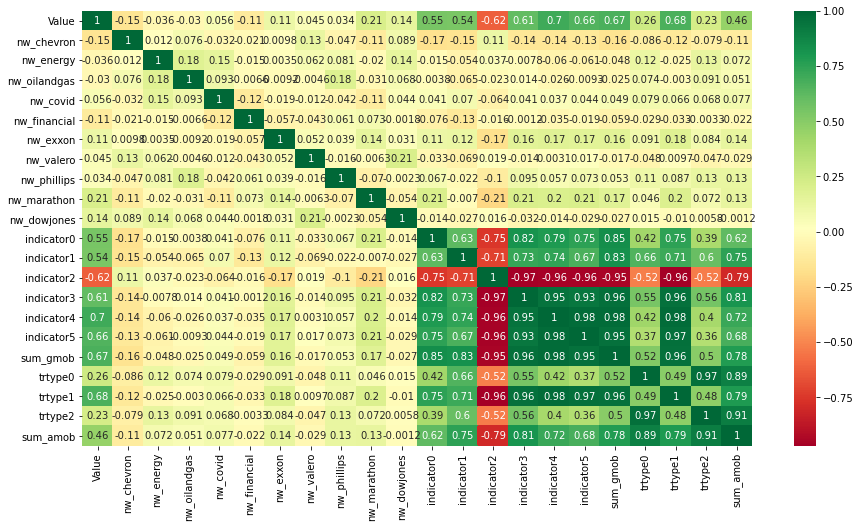

In [80]:
plt.figure(figsize=(15,8))
sns.heatmap(df_comb.corr(), cmap='RdYlGn', annot=True)
plt.show()

for apple mobility index, only transportation type "TRANSIT" which has good correlation\
so far from 3 dataset sources, we get several best feature:\
indicator0, indicator1, indicator2, indicator3, indicator4, indicator5, trtype1

## Stock Market Index

In [81]:
df_stock_index = pd.read_csv(path+'some-stock-market-indicators-_-index-2020.csv',
                       usecols=['Value','Date','Description'],
                       parse_dates=['Date'],
                       index_col='Date').sort_index()
df_stock_index.tail(20)

,Value,Description
Date,,
2020-12-28,3735.36,S&P 500
2020-12-28,849.55,DOW JONES UTILITY AVERAGE
2020-12-28,10047.26,DOW JONES COMPOSITE AVERAGE
2020-12-28,12524.02,DOW JONES TRANSPORTATION AVERAGE
2020-12-28,30403.97,DOW JONES INDUSTRIAL AVERAGE
2020-12-29,12429.48,DOW JONES TRANSPORTATION AVERAGE
2020-12-29,30335.67,DOW JONES INDUSTRIAL AVERAGE
2020-12-29,10012.73,DOW JONES COMPOSITE AVERAGE
2020-12-29,3727.04,S&P 500


In [82]:
df_stock_index['Description'].value_counts()

DOW JONES UTILITY AVERAGE           253
DOW JONES COMPOSITE AVERAGE         253
S&P 500                             253
DOW JONES TRANSPORTATION AVERAGE    253
DOW JONES INDUSTRIAL AVERAGE        253
Name: Description, dtype: int64

In [83]:
df_stidx = df_stock_index.pivot(columns='Description', values='Value')
df_stidx.columns

Index(['DOW JONES COMPOSITE AVERAGE', 'DOW JONES INDUSTRIAL AVERAGE',
       'DOW JONES TRANSPORTATION AVERAGE', 'DOW JONES UTILITY AVERAGE',
       'S&P 500'],
      dtype='object', name='Description')

In [84]:
for i,j in enumerate(df_stidx.columns):
    df_stidx.rename(columns={str(j):'idx'+str(i)}, inplace=True)
df_stidx.fillna(0, inplace=True)
df_stidx

Description,idx0,idx1,idx2,idx3,idx4
Date,,,,,
2020-01-02,9446.78,28868.80,10994.31,866.82,3257.85
2020-01-03,9385.56,28634.88,10911.40,867.44,3234.85
2020-01-06,9390.08,28703.38,10848.73,870.03,3246.28
2020-01-07,9372.83,28583.68,10887.56,868.60,3237.18
2020-01-08,9424.69,28745.09,10983.64,868.91,3253.05
...,...,...,...,...,...
2020-12-24,10000.95,30199.87,12522.92,845.97,3703.06
2020-12-28,10047.26,30403.97,12524.02,849.55,3735.36
2020-12-29,10012.73,30335.67,12429.48,848.89,3727.04


In [85]:
df_comb = pd.merge(df_comb, df_stidx, how='left', left_index=True, right_index=True)

In [86]:
df_comb.interpolate(inplace=True)
df_comb.isna().sum()

Value           0
nw_chevron      0
nw_energy       0
nw_oilandgas    0
nw_covid        0
nw_financial    0
nw_exxon        0
nw_valero       0
nw_phillips     0
nw_marathon     0
nw_dowjones     0
indicator0      0
indicator1      0
indicator2      0
indicator3      0
indicator4      0
indicator5      0
sum_gmob        0
trtype0         0
trtype1         0
trtype2         0
sum_amob        0
idx0            0
idx1            0
idx2            0
idx3            0
idx4            0
dtype: int64

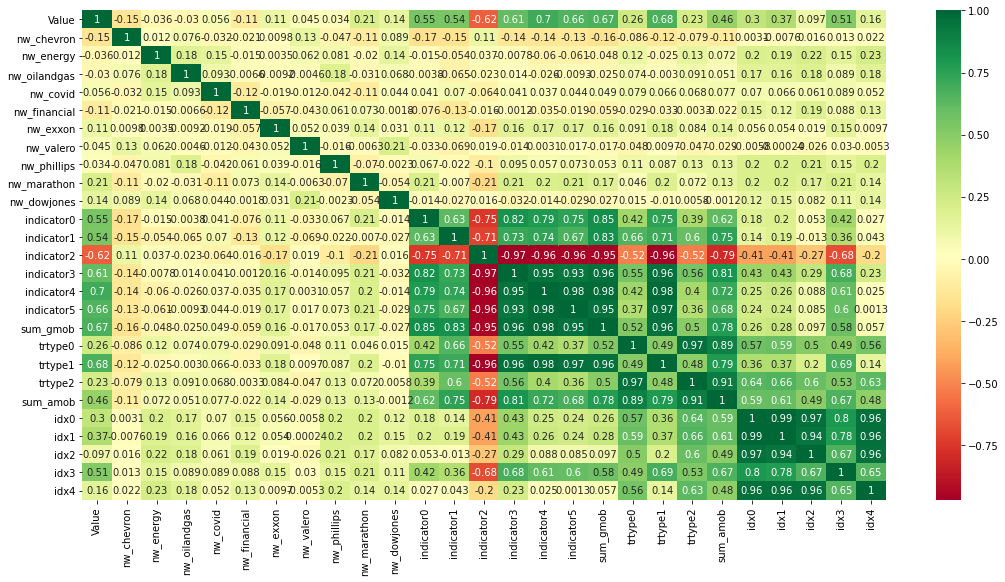

In [87]:
plt.figure(figsize=(18,9))
sns.heatmap(df_comb.corr(), cmap='RdYlGn', annot=True)
plt.show()

Highest correlation stock market index is idx3 (DOW JONES UTILITY AVERAGE)

## Select features

We select features that has correlation >5.00

In [88]:
features = ['Value','indicator0','indicator1','indicator2','indicator3','indicator4','indicator5','trtype1','idx3']

In [89]:
dataset = df_comb[features]
values = dataset.values

dataset.head()

,Value,indicator0,indicator1,indicator2,indicator3,indicator4,indicator5,trtype1,idx3
Date,,,,,,,,,
2020-01-02,121.43,0.0,0.0,0.0,0.0,0.0,0.0,100.0,866.82
2020-01-03,121.01,0.0,0.0,0.0,0.0,0.0,0.0,100.0,867.44
2020-01-06,120.60,0.0,0.0,0.0,0.0,0.0,0.0,100.0,870.03
2020-01-07,119.06,0.0,0.0,0.0,0.0,0.0,0.0,100.0,868.60
2020-01-08,117.70,0.0,0.0,0.0,0.0,0.0,0.0,100.0,868.91


In [90]:
from sklearn.preprocessing import MinMaxScaler

# normalize features
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [91]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

var1 = Value\
var2 = google mobility indicator (GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE)\
var3 = google mobility indicator (PARKS PERCENT CHANGE FROM BASELINE)\
var4 = google mobility indicator (RESIDENTIAL PERCENT CHANGE FROM BASELINE)\
var5 = google mobility indicator (RETAIL AND RECREATION PERECENT CHANGE FROM BASELINE)\
var6 = google mobility indicator (TRANSIT STATIONS PERCENT CHANGE FROM BASELINE)\
var7 = google mobility indicator (WORKPLACES PERCENT CHANGE FROM BASELINE)\
var8 = apple mobility transport type TRANSIT\
var9 = DOW JONES UTILITY AVERAGE

In [92]:
n_days = 1
n_features = len(features)

In [93]:
reframed = series_to_supervised(scaled, n_days, 1)
reframed.shape

(248, 18)

In [94]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
1,1.000000,0.714286,0.666667,0.038462,0.875,0.952381,0.940298,0.774765,0.731228,0.993805,0.714286,0.666667,0.038462,0.875,0.952381,0.940298,0.774765,0.733000
2,0.993805,0.714286,0.666667,0.038462,0.875,0.952381,0.940298,0.774765,0.733000,0.987758,0.714286,0.666667,0.038462,0.875,0.952381,0.940298,0.774765,0.740400
3,0.987758,0.714286,0.666667,0.038462,0.875,0.952381,0.940298,0.774765,0.740400,0.965044,0.714286,0.666667,0.038462,0.875,0.952381,0.940298,0.774765,0.736314
4,0.965044,0.714286,0.666667,0.038462,0.875,0.952381,0.940298,0.774765,0.736314,0.944985,0.714286,0.666667,0.038462,0.875,0.952381,0.940298,0.774765,0.737200
5,0.944985,0.714286,0.666667,0.038462,0.875,0.952381,0.940298,0.774765,0.737200,0.942183,0.714286,0.666667,0.038462,0.875,0.952381,0.940298,0.774765,0.747886


In [95]:
values = reframed.values

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
n_obs = n_days * n_features
X = values[:,:n_obs]
y = values[:,-n_features] # just need var1(t) as target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)
print(X_train.shape, len(X_train), y_train.shape)

(173, 9) 173 (173,)


In [98]:
X_train = X_train.reshape((X_train.shape[0], n_days, n_features))
X_test = X_test.reshape((X_test.shape[0], n_days, n_features))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(173, 1, 9) (173,) (75, 1, 9) (75,)


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [100]:
# design network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [101]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/100
22/22 - 1s - loss: 0.4901 - val_loss: 0.2122
Epoch 2/100
22/22 - 0s - loss: 0.2286 - val_loss: 0.1688
Epoch 3/100
22/22 - 0s - loss: 0.1008 - val_loss: 0.1250
Epoch 4/100
22/22 - 0s - loss: 0.1066 - val_loss: 0.1293
Epoch 5/100
22/22 - 0s - loss: 0.1000 - val_loss: 0.1270
Epoch 6/100
22/22 - 0s - loss: 0.0982 - val_loss: 0.1238
Epoch 7/100
22/22 - 0s - loss: 0.0966 - val_loss: 0.1268
Epoch 8/100
22/22 - 0s - loss: 0.0913 - val_loss: 0.1207
Epoch 9/100
22/22 - 0s - loss: 0.0913 - val_loss: 0.1226
Epoch 10/100
22/22 - 0s - loss: 0.0894 - val_loss: 0.1213
Epoch 11/100
22/22 - 0s - loss: 0.0862 - val_loss: 0.1177
Epoch 12/100
22/22 - 0s - loss: 0.0848 - val_loss: 0.1119
Epoch 13/100
22/22 - 0s - loss: 0.0844 - val_loss: 0.1153
Epoch 14/100
22/22 - 0s - loss: 0.0826 - val_loss: 0.1163
Epoch 15/100
22/22 - 0s - loss: 0.0784 - val_loss: 0.1090
Epoch 16/100
22/22 - 0s - loss: 0.0767 - val_loss: 0.1007
Epoch 17/100
22/22 - 0s - loss: 0.0776 - val_loss: 0.1064
Epoch 18/100
22/22 - 0s

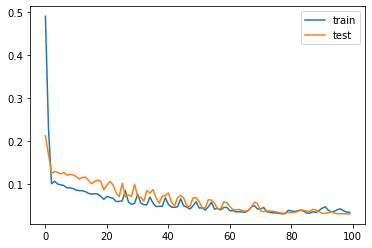

In [102]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [103]:
# make a prediction
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], n_obs))

In [104]:
# invert scaling for forecast
inv_ypred = np.concatenate((y_pred, X_test[:, -8:]), axis=1)
inv_ypred = scaler.inverse_transform(inv_ypred)
inv_ypred = inv_ypred[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, -8:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [105]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_ypred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.712


In [106]:
df_ypred = pd.DataFrame({'ypred':inv_ypred, 'ytest':inv_y})
df_ypred

,ypred,ytest
0,76.758690,78.559998
1,78.704544,78.790001
2,78.927361,78.209999
3,78.270699,76.300003
4,76.084045,75.530006
...,...,...
70,84.081123,85.329994
71,85.169411,84.900002
72,80.318474,84.610001
73,84.109413,85.329994


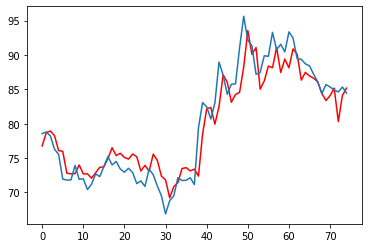

In [107]:
plt.plot(df_ypred['ypred'], color='red')
plt.plot(df_ypred['ytest'])
plt.show()

In [108]:
df_comb.corr().to_csv("Result/Correlation.csv")

In [109]:
df_ypred.to_csv("Result/Last75days_prediction_result.csv")